<a href="https://colab.research.google.com/github/WhiteCJbr/DeepLearning/blob/main/Previsao_com_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Notações Adicionais:
* Tunning : Método para achar a quantidade certa de camadas hidden na rede

### Construção da DataBase

In [4]:
! wget https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv

--2023-10-12 18:09:24--  https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2711 (2.6K) [text/plain]
Saving to: ‘Passageiros.csv’

Passageiros.csv     100%[===================>]   2.65K  --.-KB/s    in 0s      

2023-10-12 18:09:24 (42.0 MB/s) - ‘Passageiros.csv’ saved [2711/2711]



In [5]:
import pandas as pd

In [6]:
passageiros = pd.read_csv('Passageiros.csv')

In [7]:
passageiros.head() # Os numeros apos o ponto flutuante são os meses

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [8]:
import seaborn as sns
import matplotlib as mpl

In [4]:
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 22

<Axes: xlabel='tempo', ylabel='passageiros'>

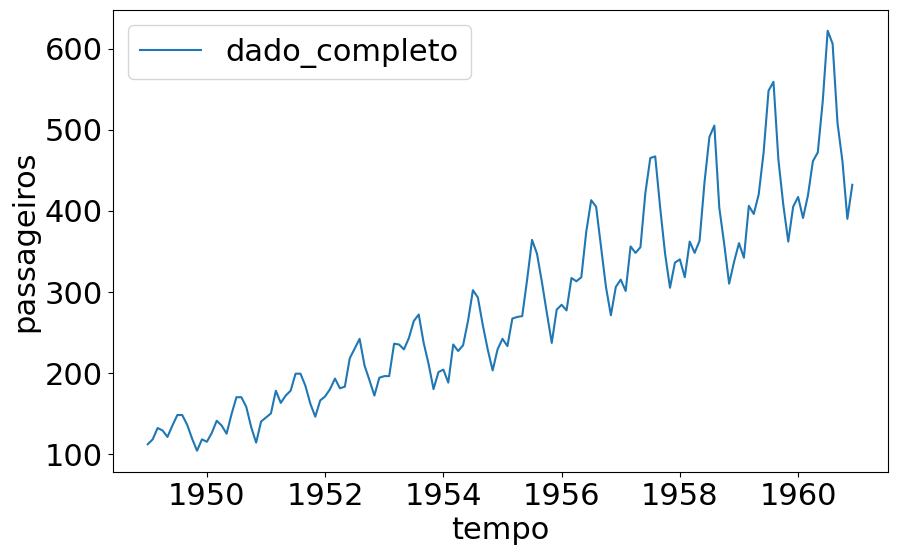

In [16]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')

# Pré Processamento

In [9]:
from sklearn.preprocessing import StandardScaler

### Escalonamento de Dados

In [11]:
sc = StandardScaler()

In [12]:
sc.fit(passageiros)

StandardScaler()

In [13]:
dado_escalado = sc.transform(passageiros)

In [14]:
x = dado_escalado[:,0] # Coluna 0 será o X do gráfico, ou seja, a entrada da rede neural
y = dado_escalado[:,1] # Coluna 1 será o y do gráfico, ou seja, a saída da rede neural

In [10]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Data')

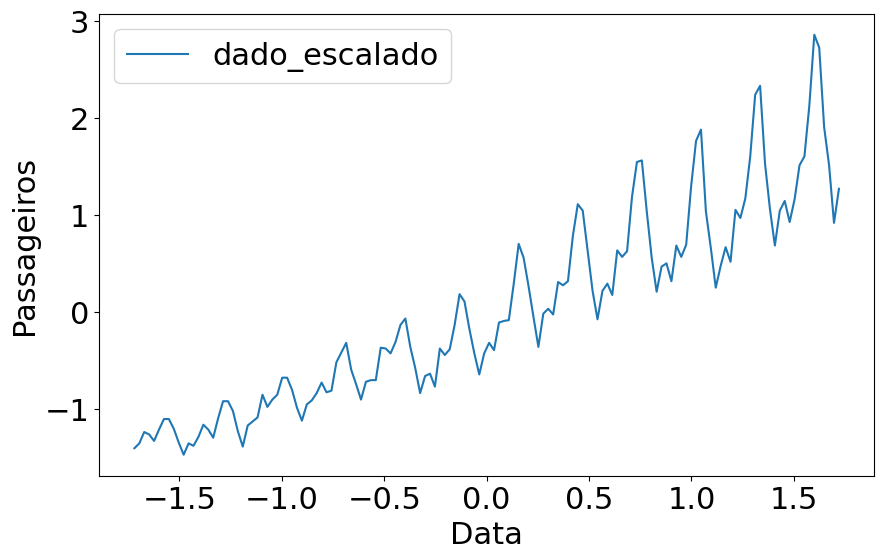

In [24]:
sns.lineplot(x=x, y=y, label = 'dado_escalado')
plt.ylabel('Passageiros')
plt.xlabel('Data')

### Divisão em treino / teste

In [15]:
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros) - tamanho_treino

In [16]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

Text(0.5, 0, 'Data')

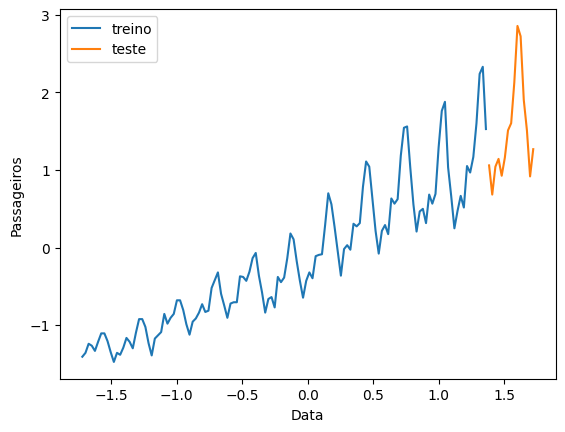

In [17]:
sns.lineplot(x=xtreino, y=ytreino,label='treino')
sns.lineplot(x=xteste, y=yteste,label='teste')

plt.ylabel('Passageiros')
plt.xlabel('Data')

# Regressão Linear

Imports

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Define a rede neural sequencial

In [15]:
regressor = Sequential()

Adiciona as camadas, pesos, ativação e vieses

In [42]:
regressor.add(Dense(1, input_dim=1, kernel_initializer='Ones', activation = 'linear',use_bias = False))

In [43]:
regressor.compile(loss='mean_squared_error', optimizer = 'adam')

In [44]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 1         
                                                                 
Total params: 1 (4.00 Byte)
Trainable params: 1 (4.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Treinamento

In [45]:
regressor.fit(xtreino, ytreino)

5/5 [==============================] - 0s 3ms/step - loss: 0.1285


Validação

In [46]:
y_predict = regressor.predict(xtreino)

5/5 [==============================] - 0s 2ms/step


<Axes: >

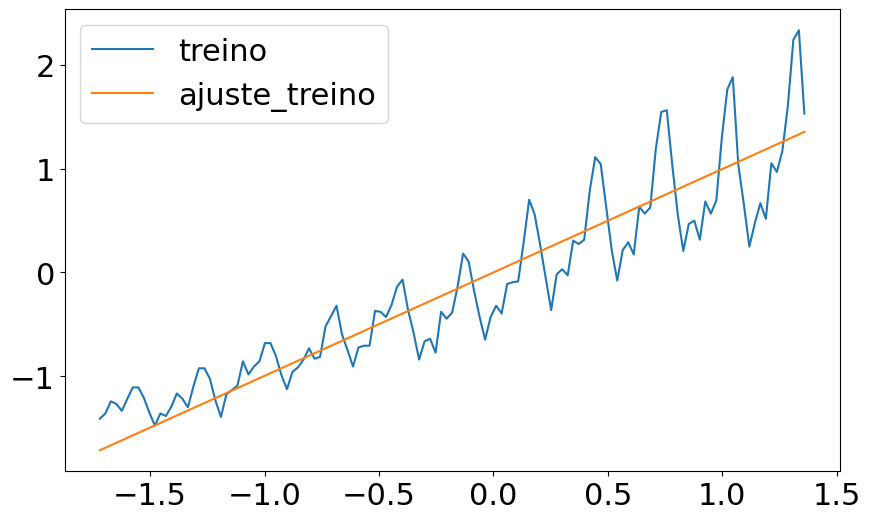

In [47]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xtreino, y=y_predict[:, 0], label='ajuste_treino')

Inverter a transformação dos dados para visualização

In [48]:
d = {'tempo': xtreino, 'passageiros': y_predict[:,0]} # Faz um dicionário temporário

In [49]:
resultados = pd.DataFrame(data=d) # Transforma em um Dataframe

In [50]:
resultados

,tempo,passageiros
0,-1.720064,-1.712001
1,-1.696007,-1.688057
2,-1.671950,-1.664113
3,-1.647894,-1.640169
4,-1.623837,-1.616225
...,...,...
124,1.262984,1.257064
125,1.287041,1.281008
126,1.311098,1.304952
127,1.335155,1.328896


In [52]:
resultado_transf = sc.inverse_transform(resultados) # Faz o reverse

In [54]:
resultado_transf = pd.DataFrame(resultado_transf) # Transforma denovo em DF

In [55]:
resultado_transf.columns = ['tempo', 'passageiros'] # Muda o nome das colunas

<Axes: xlabel='tempo', ylabel='passageiros'>

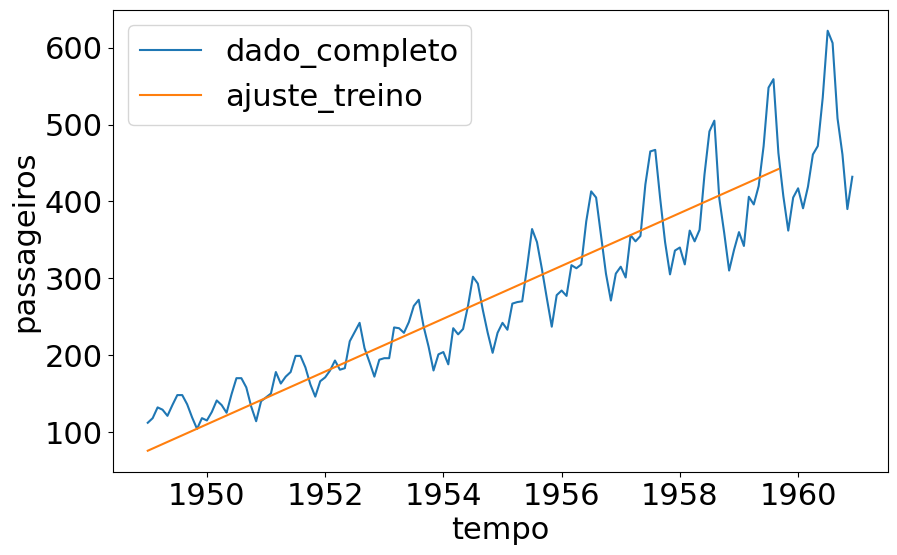

In [56]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo') # plota os dados iniciais
sns.lineplot(x='tempo', y='passageiros', data = resultado_transf,label='ajuste_treino') # plota a linha após o treinamento

## Testando a predição do modelo

In [57]:
y_predict_teste = regressor.predict(xteste) # Predição com o xteste

1/1 [==============================] - 0s 41ms/step


In [60]:
d = {'tempo': xteste, 'passageiros': y_predict_teste[:,0]} # Transformação em DF
resultados_teste = pd.DataFrame(data=d)

In [61]:
resultado_transf_teste = sc.inverse_transform(resultados_teste) # Reverse

In [62]:
resultado_transf_teste = pd.DataFrame(resultado_transf_teste) # DF pós Reverse

In [63]:
resultado_transf_teste.columns = ['tempo', 'passageiros'] # Muda o nome das colunas

<Axes: xlabel='tempo', ylabel='passageiros'>

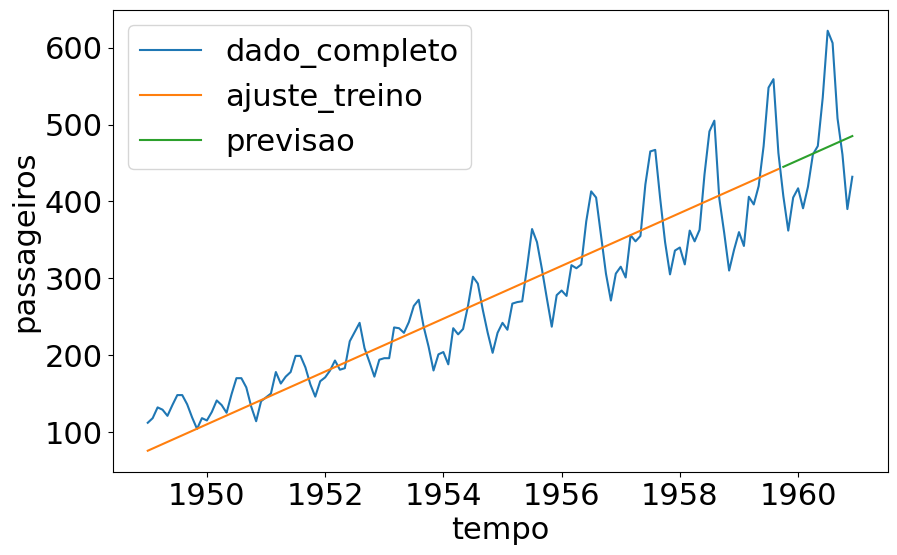

In [64]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo') # Dado puro
sns.lineplot(x='tempo', y='passageiros', data = resultado_transf,label='ajuste_treino') # Dado antes do teste final
sns.lineplot(x='tempo', y='passageiros', data = resultado_transf_teste, label='previsao') # Dado após o teste de predição / regressão

In [34]:
regressor2 = Sequential()

In [35]:
regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))

regressor2.add(Dense(8,kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))

regressor2.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [36]:
regressor2.compile(loss='mean_squared_error', optimizer='adam')

In [37]:
regressor2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 8         
                                                                 
 dense_4 (Dense)             (None, 8)                 64        
                                                                 
 dense_5 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80 (320.00 Byte)
Trainable params: 80 (320.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
regressor2.fit(xtreino, ytreino, epochs=500)

Epoch 1/500
5/5 [==============================] - 1s 6ms/step - loss: 0.8050
Epoch 2/500
5/5 [==============================] - 0s 4ms/step - loss: 0.7996
Epoch 3/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7972
Epoch 4/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7967
Epoch 5/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7942
Epoch 6/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7923
Epoch 7/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7901
Epoch 8/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7870
Epoch 9/500
5/5 [==============================] - 0s 4ms/step - loss: 0.7863
Epoch 10/500
5/5 [==============================] - 0s 5ms/step - loss: 0.7842
Epoch 11/500
5/5 [==============================] - 0s 4ms/step - loss: 0.7825
Epoch 12/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7819
Epoch 13/500
5/5 [==============================] - 0s 4ms/st

In [39]:
y_predict = regressor2.predict(xtreino)

5/5 [==============================] - 0s 2ms/step


In [40]:
y_predict_teste = regressor2.predict(xteste)

1/1 [==============================] - 0s 22ms/step


<Axes: >

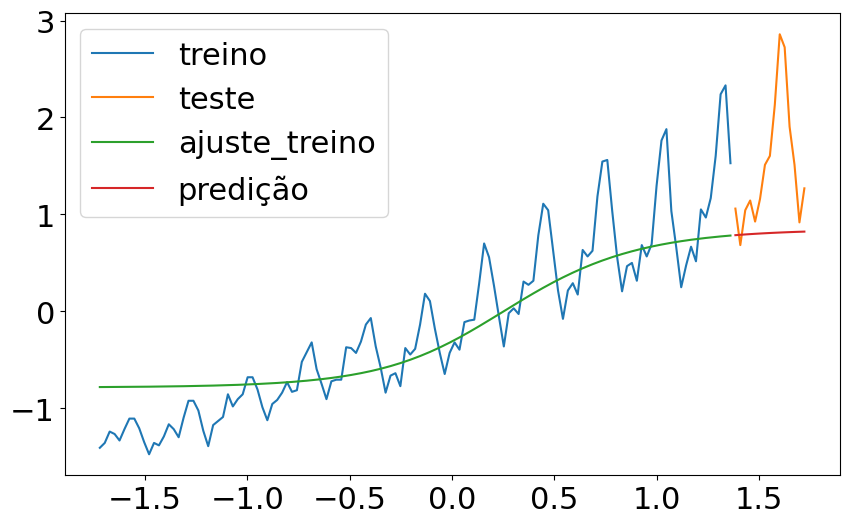

In [41]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xteste, y=yteste, label='teste')
sns.lineplot(x=xtreino, y=y_predict[:,0], label = 'ajuste_treino')
sns.lineplot(x=xteste, y=y_predict_teste[:,0], label = 'predição')

# Testando outro método para previsão

Agora ao invés de prever os dados colocando o tempo como entrada e esperando o número de passageiros como saída, iremos usar os próprios passageiros para prever eles mesmos (y)

### Exemplo:
1. y1 irá prever y2
2. y2 irá prever y3
3. y3 irá prever y4
...


In [20]:
vetor = pd.DataFrame(ytreino)[0] # Os valores dos passageiros
vetor.head()

0   -1.407779
1   -1.357590
2   -1.240483
3   -1.265578
4   -1.332496
Name: 0, dtype: float64

### Separa os dados dos passageiros em 2 vetores

In [21]:
import numpy as np

In [22]:
def separa_dados(vetor, n_passos): # Faz a separação dos passageiros em 2 vetores
  X_novo, Y_novo = [], []

  for i in range(n_passos, vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    Y_novo.append(vetor.loc[i])
  X_novo, Y_novo = np.array(X_novo), np.array(Y_novo)
  return X_novo, Y_novo

In [23]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 1)

In [24]:
xtreino_novo[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [25]:
ytreino_novo[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [26]:
vetor2 = pd.DataFrame(yteste)[0] # Linha 0 = linha dos passageiros

In [27]:
xteste_novo, yteste_novo = separa_dados(vetor2, 1)

Constrói a rede neural

In [28]:
regressor3 = Sequential()

In [29]:
regressor3.add(Dense(8, input_dim=1, kernel_initializer = 'ones', activation = 'linear', use_bias=False))
regressor3.add(Dense(64, kernel_initializer = 'random_uniform', activation='sigmoid', use_bias = False))
regressor3.add(Dense(1, kernel_initializer='random_uniform', activation = 'linear', use_bias= False))

In [30]:
regressor3.compile(loss='mean_squared_error', optimizer = 'adam')

Treino

In [31]:
regressor3.fit(xtreino_novo, ytreino_novo, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 7ms/step - loss: 0.8023
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7646
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7325
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7129
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6934
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6721
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6494
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6257
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5939
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5637
Epoch 11/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5317
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4986
Epoch 13/100
4/4 [==============================] - 0s 4ms/st

In [32]:
y_predict_novo = regressor3.predict(xtreino_novo) # Predição dos dados ainda dentro do treino

4/4 [==============================] - 0s 3ms/step


<Axes: xlabel='tempo', ylabel='0'>

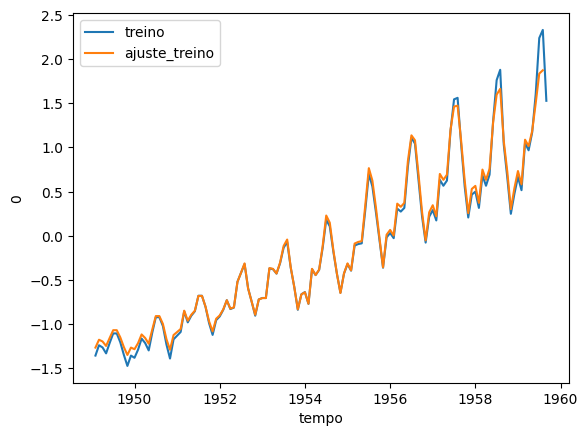

In [33]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data = passageiros[1:129], label='ajuste_treino')

### Previsão dos dados nos testes

In [34]:
y_predict_teste_novo = regressor3.predict(xteste_novo)

1/1 [==============================] - 0s 48ms/step


In [35]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<Axes: xlabel='tempo', ylabel='0'>

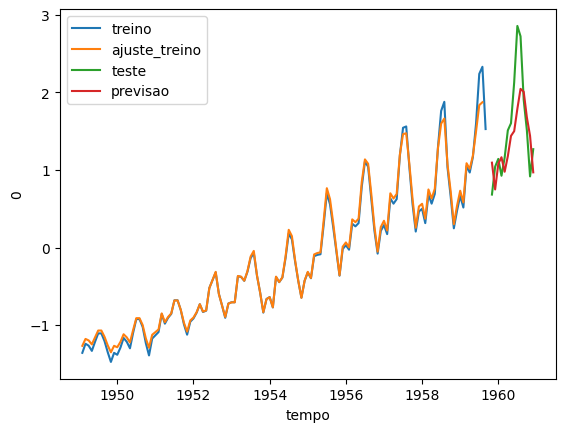

In [36]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data = passageiros[1:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=yteste_novo, data=passageiros[130:144], label='teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[130:144], label='previsao')

Agora vamos testar utilizando 4 valores anteriores a aqueles que queremos prever para ter uma maior precisão

### Exemplo
* (y1, y2, y3, y4) irão prever y5

In [37]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 4)

In [38]:
xtreino_novo[0:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [39]:
ytreino_novo[0:5]

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [44]:
xteste_novo, yteste_novo = separa_dados(vetor2, 4)

In [45]:
regressor4 = Sequential()

In [46]:
regressor4.add(Dense(8, input_dim=4, kernel_initializer = 'ones', activation = 'linear', use_bias=False))
regressor4.add(Dense(64, kernel_initializer = 'random_uniform', activation='sigmoid', use_bias = False))
regressor4.add(Dense(1, kernel_initializer='random_uniform', activation = 'linear', use_bias= False))

In [47]:
regressor4.compile(loss='mean_squared_error', optimizer = 'adam')

In [48]:
regressor4.fit(xtreino_novo, ytreino_novo, epochs = 300)

Epoch 1/300
4/4 [==============================] - 1s 6ms/step - loss: 0.7580
Epoch 2/300
4/4 [==============================] - 0s 5ms/step - loss: 0.6741
Epoch 3/300
4/4 [==============================] - 0s 6ms/step - loss: 0.6055
Epoch 4/300
4/4 [==============================] - 0s 5ms/step - loss: 0.5393
Epoch 5/300
4/4 [==============================] - 0s 6ms/step - loss: 0.4709
Epoch 6/300
4/4 [==============================] - 0s 5ms/step - loss: 0.4040
Epoch 7/300
4/4 [==============================] - 0s 5ms/step - loss: 0.3454
Epoch 8/300
4/4 [==============================] - 0s 6ms/step - loss: 0.2834
Epoch 9/300
4/4 [==============================] - 0s 5ms/step - loss: 0.2370
Epoch 10/300
4/4 [==============================] - 0s 4ms/step - loss: 0.2016
Epoch 11/300
4/4 [==============================] - 0s 4ms/step - loss: 0.1761
Epoch 12/300
4/4 [==============================] - 0s 4ms/step - loss: 0.1548
Epoch 13/300
4/4 [==============================] - 0s 4ms/st

In [49]:
y_predict_novo = regressor4.predict(xtreino_novo)

4/4 [==============================] - 0s 3ms/step


In [50]:
y_predict_teste_novo = regressor4.predict(xteste_novo)

1/1 [==============================] - 0s 25ms/step


In [51]:
resultado_treino = pd.DataFrame(y_predict_novo)[0]

In [52]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<Axes: xlabel='tempo', ylabel='0'>

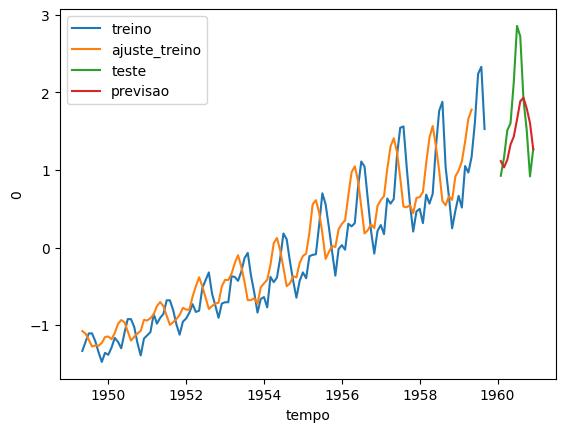

In [53]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[4:129], label='treino')
sns.lineplot(x='tempo', y=resultado_treino, data = passageiros[4:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=yteste_novo, data=passageiros[133:144], label='teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[133:144], label='previsao')

# Novo Problema

In [60]:
!

In [61]:
bike = pd.read_csv('bicicletas.csv')

In [62]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [63]:
bike['datas'] = pd.to_datetime(bike['datas'])

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

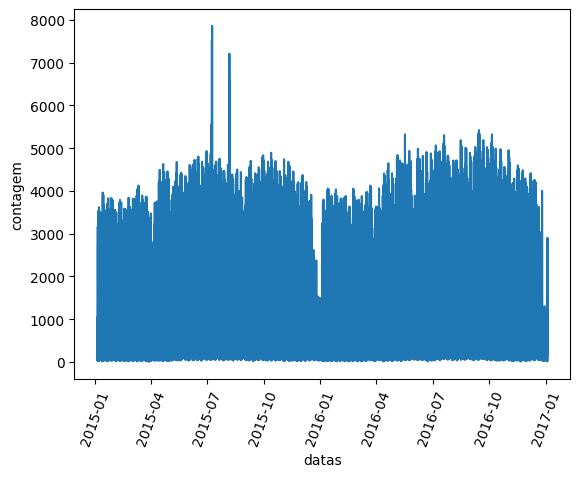

In [66]:
sns.lineplot(x='datas', y='contagem', data=bike)
plt.xticks(rotation=70)

In [67]:
sc2 = StandardScaler()

In [68]:
sc2.fit(bike['contagem'].values.reshape(-1,1))

StandardScaler()

In [69]:
y = sc2.transform(bike['contagem'].values.reshape(-1,1))

In [70]:
tamanho_treino = int(len(bike)*0.9)
tamanho_teste = len(bike) - tamanho_treino

In [71]:
ytreino = y[0:tamanho_treino]

In [72]:
yteste = y[tamanho_treino:len(bike)]

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

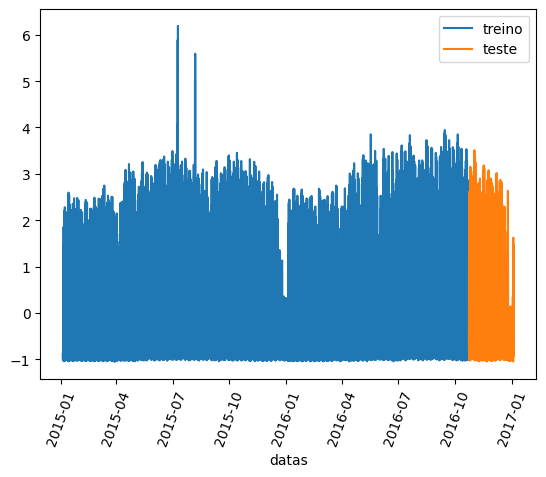

In [76]:
sns.lineplot(x='datas', y=ytreino[:,0], data=bike[0:tamanho_treino], label='treino')
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='teste')
plt.xticks(rotation=70)

In [77]:
vetor = pd.DataFrame(ytreino)[0]

In [111]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 10)

In [81]:
xtreino_novo

array([[-0.88574518, -0.9262953 , -0.92998167, ..., -0.9843557 ,
        -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, ..., -0.93274645,
        -0.77607553, -0.56687377],
       [-0.92998167, -0.98712048, -1.01016032, ..., -0.77607553,
        -0.56687377, -0.38347663],
       ...,
       [-0.02774148, -0.29131727, -0.4323211 , ..., -0.72630948,
        -0.8534894 , -0.91523618],
       [-0.29131727, -0.4323211 , -0.51065656, ..., -0.8534894 ,
        -0.91523618, -0.9548647 ],
       [-0.4323211 , -0.51065656, -0.55212827, ..., -0.91523618,
        -0.9548647 , -0.9548647 ]])

In [112]:
vetor2 = pd.DataFrame(yteste)[0]

In [113]:
xteste_novo, yteste_novo = separa_dados(vetor2, 10)

### Utilizando uma Estrutura Recorrente

Utilizaremos uma estrutura recorrente para previsão destes dados

A estrutura recorrente utiliza todos os valores anteriores para fazer a previsão do próximo.

In [114]:
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0], xtreino_novo.shape[1], 1)) # Reorganização dos dados para uso neste novo modelo, colocando 1 coluna a mais

In [115]:
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0], xteste_novo.shape[1], 1)) # Reorganização dos dados para uso neste novo modelo, colocando 1 coluna a mais

## Utilizando o LSTM

In [116]:
from tensorflow.keras.layers import LSTM

In [117]:
recorrente = Sequential()

In [118]:
recorrente.add(LSTM(128, input_shape=(xtreino_novo.shape[1], xtreino_novo.shape[2]))) # Memória de longo prazo = LSTM
recorrente.add(Dense(units=1))

In [119]:
recorrente.compile(loss='mean_squared_error', optimizer='RMSProp')

In [120]:
recorrente.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66689 (260.50 KB)
Trainable params: 66689 (260.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [121]:
resultado = recorrente.fit(xtreino_novo, ytreino_novo,
                           validation_data= (xteste_novo,yteste_novo), epochs=100)

Epoch 1/100
490/490 [==============================] - 12s 20ms/step - loss: 0.2991 - val_loss: 0.1295
Epoch 2/100
490/490 [==============================] - 9s 19ms/step - loss: 0.0864 - val_loss: 0.0453
Epoch 3/100
490/490 [==============================] - 8s 17ms/step - loss: 0.0567 - val_loss: 0.0366
Epoch 4/100
490/490 [==============================] - 9s 19ms/step - loss: 0.0489 - val_loss: 0.0285
Epoch 5/100
490/490 [==============================] - 9s 19ms/step - loss: 0.0442 - val_loss: 0.0243
Epoch 6/100
490/490 [==============================] - 8s 16ms/step - loss: 0.0407 - val_loss: 0.0305
Epoch 7/100
490/490 [==============================] - 9s 19ms/step - loss: 0.0388 - val_loss: 0.0229
Epoch 8/100
490/490 [==============================] - 11s 22ms/step - loss: 0.0371 - val_loss: 0.0245
Epoch 9/100
490/490 [==============================] - 9s 19ms/step - loss: 0.0356 - val_loss: 0.0242
Epoch 10/100
490/490 [==============================] - 8s 16ms/step - loss: 0.0

In [122]:
y_ajustado = recorrente.predict(xtreino_novo)

490/490 [==============================] - 5s 9ms/step


(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10')])

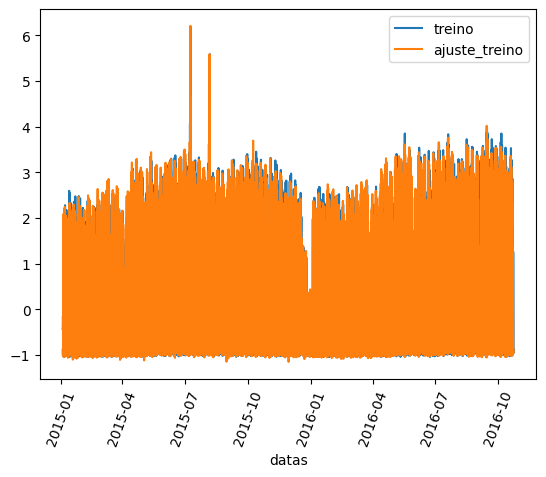

In [126]:
sns.lineplot(x='datas', y=ytreino[:,0], data=bike[0:tamanho_treino], label='treino')
sns.lineplot(x='datas', y=y_ajustado[:,0], data = bike[0:15662], label='ajuste_treino')
plt.xticks(rotation=70)

In [127]:
y_predito = recorrente.predict(xteste_novo)

55/55 [==============================] - 0s 7ms/step


<Axes: xlabel='datas'>

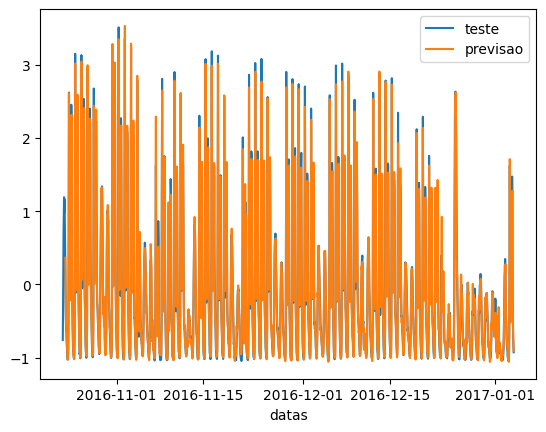

In [129]:
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label = 'teste')
sns.lineplot(x='datas', y=y_predito[:,0], data=bike[tamanho_treino+10:len(bike)], label = 'previsao')

## Utilizando o GRU

GRU pode ser uma forma de treinamento, como o LSTM
Contudo o LSTM é melhor com muitos dados

In [131]:
from tensorflow.keras.layers import GRU

In [132]:
recorrente_g = Sequential()

In [133]:
recorrente_g.add(GRU(128, input_shape=(xtreino_novo.shape[1], xtreino_novo.shape[2])))
recorrente_g.add(Dense(units=1))

In [135]:
recorrente_g.compile(loss='mean_squared_error', optimizer='RMSProp')

In [136]:
recorrente.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66689 (260.50 KB)
Trainable params: 66689 (260.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [137]:
recorrente_g.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 50433 (197.00 KB)
Trainable params: 50433 (197.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [138]:
resultado2 = recorrente_g.fit(xtreino_novo, ytreino_novo, validation_data=(xteste_novo, yteste_novo), epochs=100)

Epoch 1/100
490/490 [==============================] - 11s 15ms/step - loss: 0.2207 - val_loss: 0.0868
Epoch 2/100
490/490 [==============================] - 8s 16ms/step - loss: 0.0702 - val_loss: 0.0357
Epoch 3/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0525 - val_loss: 0.0416
Epoch 4/100
490/490 [==============================] - 11s 22ms/step - loss: 0.0438 - val_loss: 0.0283
Epoch 5/100
490/490 [==============================] - 9s 19ms/step - loss: 0.0397 - val_loss: 0.0218
Epoch 6/100
490/490 [==============================] - 8s 15ms/step - loss: 0.0374 - val_loss: 0.0199
Epoch 7/100
490/490 [==============================] - 8s 16ms/step - loss: 0.0351 - val_loss: 0.0241
Epoch 8/100
490/490 [==============================] - 11s 23ms/step - loss: 0.0338 - val_loss: 0.0195
Epoch 9/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0324 - val_loss: 0.0188
Epoch 10/100
490/490 [==============================] - 9s 19ms/step - loss: 0.

In [139]:
y_predito2 = recorrente_g.predict(xteste_novo)

55/55 [==============================] - 1s 7ms/step


<Axes: xlabel='datas'>

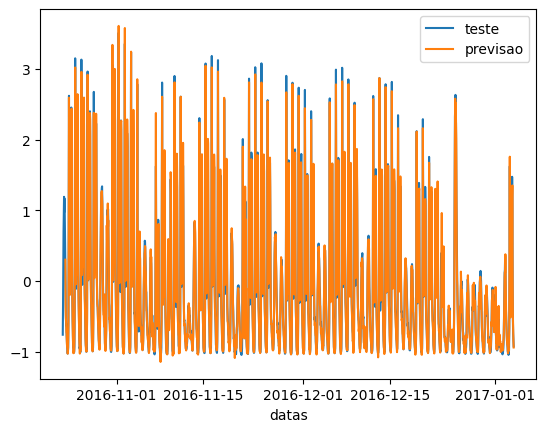

In [140]:
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label ='teste')
sns.lineplot(x='datas', y=y_predito2[:,0], data=bike[tamanho_treino+10:len(bike)], label = 'previsao')

# Comparando LTSM com o GRU

In [141]:
print(resultado2.history.keys())

dict_keys(['loss', 'val_loss'])


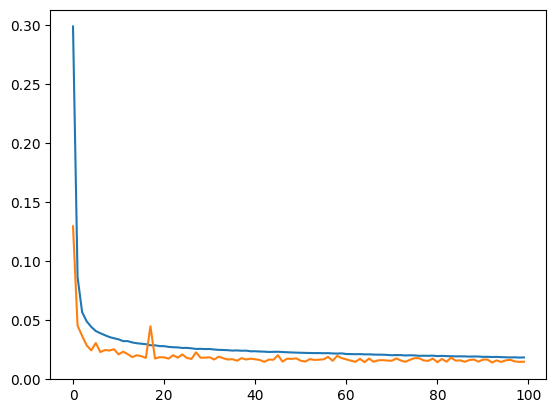

In [142]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])

Text(0, 0.5, 'Custo')

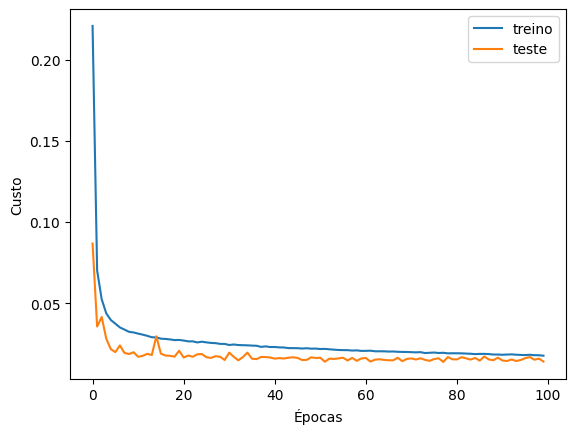

In [143]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])
plt.legend(['treino', 'teste'])
plt.xlabel('Épocas')
plt.ylabel('Custo')